In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
import numpy as np
from PIL import Image

# DataGenerator

In [17]:
data_path = '/content/drive/MyDrive/DATASET/image data'
fruit = 'corn '

In [18]:
# Creating Train Data Path for a single Fruit
train_data_path = os.path.join(data_path,"train",fruit)

In [19]:
test_data_path = os.path.join(data_path,"test",fruit)

In [20]:
def load_image_dataset(dataset_directory:str,img_height:int = 224,img_width:int = 224,flatten_image:bool = False):
    """
        Params:
        dataset_directory: path to your dataset directory,
        img_height = standard height of image
        img_width = standard width of image
        flatten_image = False: Image will be returned with actual size
                        True : Image will be flattened

    """

    # Create empty lists to store the images and their corresponding labels
    images = []
    labels = []

    # Iterate through the subdirectories (each subdirectory represents a class)
    for class_name in os.listdir(dataset_directory):
        class_dir = os.path.join(dataset_directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)  # Open the image using PIL
            image = image.resize((img_width, img_height))  # Resize the image to a desired size
            image = np.array(image)  # Convert the image to a numpy array
            images.append(image)
            labels.append(class_name)

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)


    if flatten_image: # flattening image i.e converting image into vector
        images = images.reshape(images.shape[0],-1)

    return images,labels


In [21]:
X_train,y_train = load_image_dataset(dataset_directory=train_data_path,flatten_image=True)

In [22]:
X_test,y_test =  load_image_dataset(dataset_directory=test_data_path,flatten_image=True)

In [23]:
X_train.shape

(2776, 150528)

In [24]:
y_train.shape

(2776,)

In [25]:
import joblib

def save_model(model,fruit:str,filename:str,location:str):

    location = os.path.join(location,fruit)
    if not os.path.isdir(location):
        os.mkdir(location)

    filename = os.path.join(location,filename+".jblib")

    joblib.dump(model,filename=filename)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
from sklearn.metrics import accuracy_score

# Model - 1 Support vector Machine

In [28]:
from sklearn.svm import SVC

model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [29]:
train_pred1 = model1.predict(X_train)
train_pred1

array(['cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot', ..., 'healthy', 'healthy',
       'healthy'], dtype='<U35')

In [30]:
train_score1=accuracy_score(y_train,train_pred1)
A= round(train_score1, 4)
train_score1

0.9351585014409222

In [31]:
pred1 = model1.predict(X_test)
pred1

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 

In [32]:
score1=accuracy_score(y_test,pred1)
a= round(score1, 4)
score1

0.9322916666666666

In [33]:
print("Support vector Machine Confusion matrix: \n\n", confusion_matrix(y_test, pred1))

Support vector Machine Confusion matrix: 

 [[ 25   0   0  26]
 [  0 119   0   0]
 [  0   0 116   0]
 [  0   0   0  98]]


In [34]:
print("Support vector Machine Classification report: \n\n", classification_report(y_test, pred1))
print("Test Accuracy: {}%".format(round(model1.score(X_test, y_test)*100, 2)))

Support vector Machine Classification report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       1.00      0.49      0.66        51
                        common rust       1.00      1.00      1.00       119
                            healthy       1.00      1.00      1.00       116
               northern leaf blight       0.79      1.00      0.88        98

                           accuracy                           0.93       384
                          macro avg       0.95      0.87      0.89       384
                       weighted avg       0.95      0.93      0.92       384

Test Accuracy: 93.23%


In [35]:
save_model(model1,fruit=fruit,location="/content/drive/MyDrive/saved",filename="SVM")

# Model -2  Multi-layer Perceptron

In [36]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier()
model2.fit(X_train, y_train)

MLPClassifier()

In [37]:
train_pred2 = model2.predict(X_train)
train_pred2

array(['cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot', ..., 'healthy', 'healthy',
       'healthy'], dtype='<U35')

In [38]:
train_score2=accuracy_score(y_train,train_pred2)
B= round(train_score2, 4)
train_score2

0.9268731988472623

In [39]:
pred2 = model2.predict(X_test)
pred2

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 

In [40]:
score2=accuracy_score(y_test,pred2)
b= round(score2, 4)
score2

0.9296875

In [41]:
print(" Multi-layer Perceptron Confusion matrix: \n\n", confusion_matrix(y_test, pred2))

 Multi-layer Perceptron Confusion matrix: 

 [[ 32   1   1  17]
 [  0 119   0   0]
 [  0   0 116   0]
 [  5   0   3  90]]


In [42]:
print(" Multi-layer Perceptron report: \n\n", classification_report(y_test, pred2))
print("Test Accuracy: {}%".format(round(model2.score(X_test, y_test)*100, 2)))

 Multi-layer Perceptron report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       0.86      0.63      0.73        51
                        common rust       0.99      1.00      1.00       119
                            healthy       0.97      1.00      0.98       116
               northern leaf blight       0.84      0.92      0.88        98

                           accuracy                           0.93       384
                          macro avg       0.92      0.89      0.90       384
                       weighted avg       0.93      0.93      0.93       384

Test Accuracy: 92.97%


In [43]:
save_model(model2,fruit=fruit,location="/content/drive/MyDrive/saved",filename="MLP")

# Model -3  AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier()
model3.fit(X_train, y_train)

AdaBoostClassifier()

In [45]:
train_pred3 = model3.predict(X_train)
train_pred3

array(['healthy', 'healthy', 'healthy', ..., 'healthy', 'healthy',
       'healthy'], dtype='<U35')

In [46]:
train_score3=accuracy_score(y_train,train_pred3)
C= round(train_score3, 4)
train_score3

0.6120317002881844

In [47]:
pred3 = model3.predict(X_test)
pred3

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy',
       'cercospora leaf spot gray leaf spot', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy'

In [48]:
score3=accuracy_score(y_test,pred3)
c= round(score3, 4)
score3

0.609375

In [49]:
print(" AdaBoost Confusion matrix: \n\n", confusion_matrix(y_test, pred3))

 AdaBoost Confusion matrix: 

 [[  0   0  51   0]
 [  0 119   0   0]
 [  1   0 115   0]
 [  0   0  98   0]]


In [50]:
print(" AdaBoost Classification report: \n\n", classification_report(y_test, pred3))
print("Test Accuracy: {}%".format(round(model3.score(X_test, y_test)*100, 2)))

 AdaBoost Classification report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       0.00      0.00      0.00        51
                        common rust       1.00      1.00      1.00       119
                            healthy       0.44      0.99      0.61       116
               northern leaf blight       0.00      0.00      0.00        98

                           accuracy                           0.61       384
                          macro avg       0.36      0.50      0.40       384
                       weighted avg       0.44      0.61      0.49       384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 60.94%


In [51]:
save_model(model3,fruit=fruit,location="/content/drive/MyDrive/saved",filename="Ada")

# Model -4 K-nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier


model4= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [53]:
train_pred4 = model4.predict(X_train)
train_pred4

array(['cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot', 'northern leaf blight', ...,
       'healthy', 'healthy', 'healthy'], dtype='<U35')

In [54]:
train_score4=accuracy_score(y_train,train_pred4)
D= round(train_score4, 3)
train_score4

0.904178674351585

In [55]:
pred4= model4.predict(X_test)
pred4

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'northern leaf blight', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy'

In [56]:
score4=accuracy_score(y_test,pred4)
d= round(score4, 4)
score4

0.9088541666666666

In [57]:
print("K-nearest Neighbors Confusion matrix: \n\n", confusion_matrix(y_test, pred4))

K-nearest Neighbors Confusion matrix: 

 [[ 35   0   2  14]
 [  2 116   0   1]
 [  0   0 115   1]
 [ 10   0   5  83]]


In [58]:
print("K-nearest Neighbors Classification report: \n\n", classification_report(y_test, pred4))
print("Test Accuracy: {}%".format(round(model4.score(X_test, y_test)*100, 2)))

K-nearest Neighbors Classification report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       0.74      0.69      0.71        51
                        common rust       1.00      0.97      0.99       119
                            healthy       0.94      0.99      0.97       116
               northern leaf blight       0.84      0.85      0.84        98

                           accuracy                           0.91       384
                          macro avg       0.88      0.87      0.88       384
                       weighted avg       0.91      0.91      0.91       384

Test Accuracy: 90.89%


In [59]:
save_model(model4,fruit=fruit,location="/content/drive/MyDrive/saved",filename="KNN")

# Model -5 Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

model5= RandomForestClassifier(n_estimators= 150, criterion="gini",verbose=1, random_state=0)
model5.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   32.7s


RandomForestClassifier(n_estimators=150, random_state=0, verbose=1)

In [61]:
train_pred5 = model5.predict(X_train)
train_pred5

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


array(['cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot', ..., 'healthy', 'healthy',
       'healthy'], dtype='<U35')

In [62]:
train_score5=accuracy_score(y_train,train_pred5)
E= round(train_score5, 4)
train_score5

1.0

In [63]:
pred5= model5.predict(X_test)
pred5

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 

In [64]:
score5=accuracy_score(y_test,pred5)
e= round(score5, 4)
score5

1.0

In [65]:
print("Random Forest Confusion matrix: \n\n", confusion_matrix(y_test, pred5))

Random Forest Confusion matrix: 

 [[ 51   0   0   0]
 [  0 119   0   0]
 [  0   0 116   0]
 [  0   0   0  98]]


In [66]:
print(" Random Forest  Classification report: \n\n", classification_report(y_test, pred5))
print("Test Accuracy: {}%".format(round(model5.score(X_test, y_test)*100, 2)))

 Random Forest  Classification report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       1.00      1.00      1.00        51
                        common rust       1.00      1.00      1.00       119
                            healthy       1.00      1.00      1.00       116
               northern leaf blight       1.00      1.00      1.00        98

                           accuracy                           1.00       384
                          macro avg       1.00      1.00      1.00       384
                       weighted avg       1.00      1.00      1.00       384

Test Accuracy: 100.0%


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [67]:
save_model(model5,fruit=fruit,location="/content/drive/MyDrive/saved",filename="RF")

# Model -6 Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

model6= DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=2, min_samples_leaf=1)
model6.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [69]:
train_pred6 = model6.predict(X_train)
train_pred6

array(['cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot',
       'cercospora leaf spot gray leaf spot', ..., 'healthy', 'healthy',
       'healthy'], dtype='<U35')

In [70]:
train_score6=accuracy_score(y_train,train_pred6)
F= round(train_score6, 4)
train_score6

1.0

In [71]:
pred6= model6.predict(X_test)
pred6

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 

In [72]:
score6=accuracy_score(y_test,pred6)
f= round(score6, 4)
score6

1.0

In [73]:
print("Decision Tree Confusion matrix: \n\n", confusion_matrix(y_test, pred6))

Decision Tree Confusion matrix: 

 [[ 51   0   0   0]
 [  0 119   0   0]
 [  0   0 116   0]
 [  0   0   0  98]]


In [74]:
print("Decision Tree Classification report: \n\n", classification_report(y_test, pred6))
print("Test Accuracy: {}%".format(round(model6.score(X_test, y_test)*100, 2)))

Decision Tree Classification report: 

                                      precision    recall  f1-score   support

cercospora leaf spot gray leaf spot       1.00      1.00      1.00        51
                        common rust       1.00      1.00      1.00       119
                            healthy       1.00      1.00      1.00       116
               northern leaf blight       1.00      1.00      1.00        98

                           accuracy                           1.00       384
                          macro avg       1.00      1.00      1.00       384
                       weighted avg       1.00      1.00      1.00       384

Test Accuracy: 100.0%


In [75]:
save_model(model6,fruit=fruit,location="/content/drive/MyDrive/saved",filename="DT")

# Comparision Using Box plot

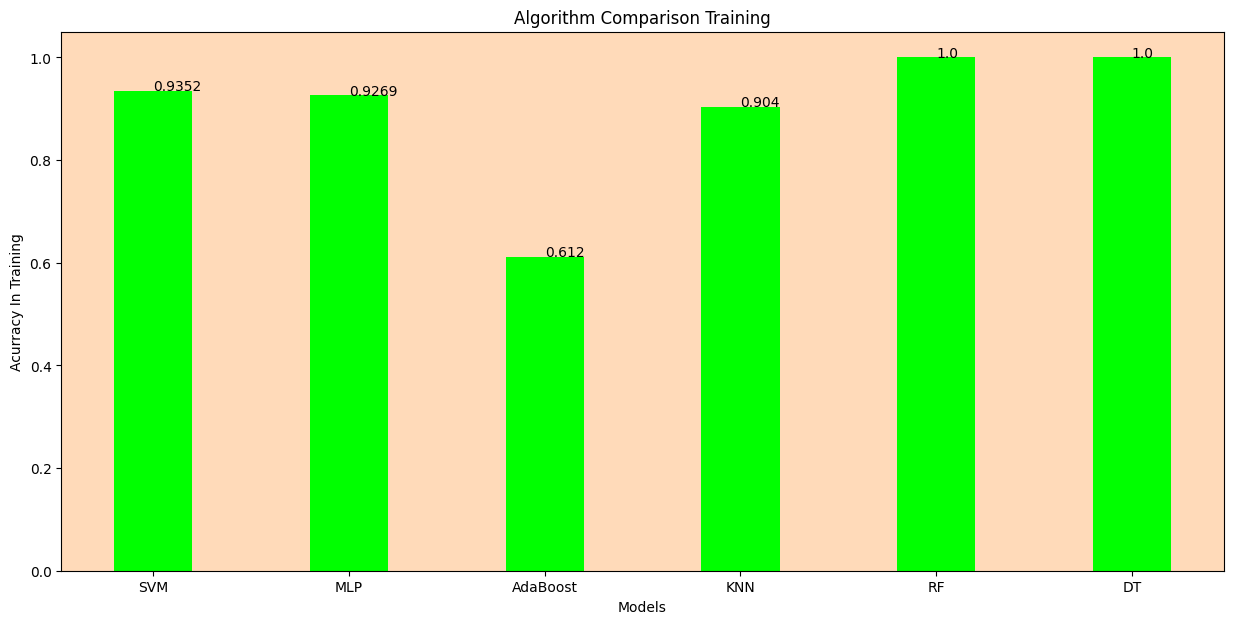

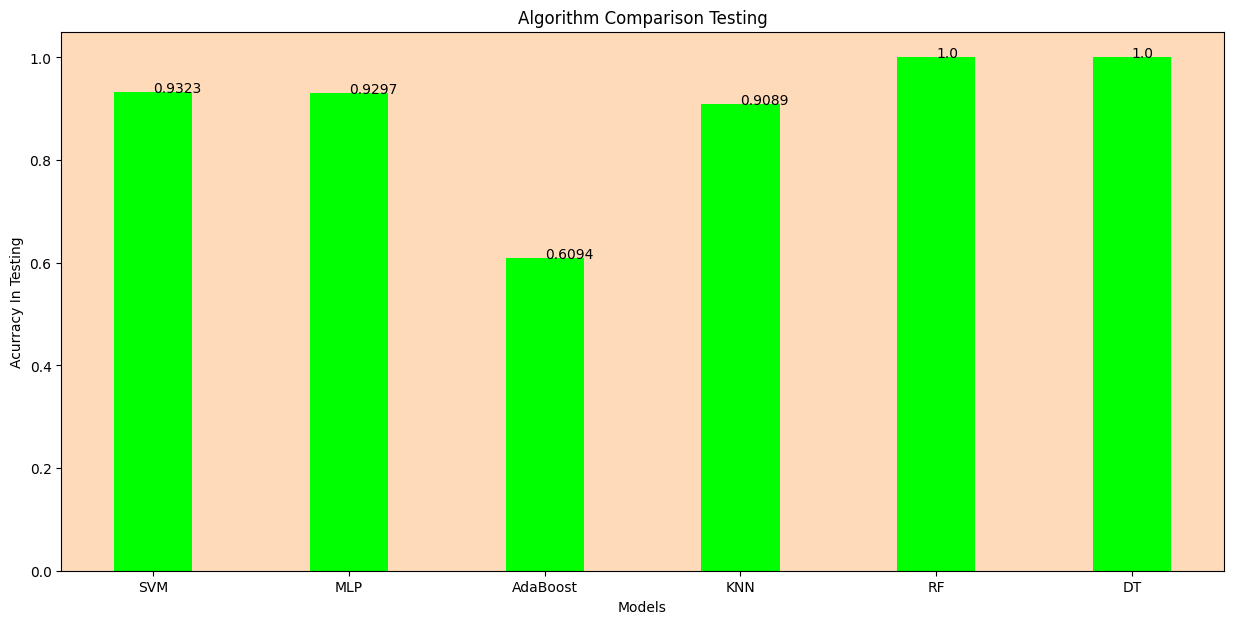

In [76]:
from matplotlib import pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['SVM', 'MLP', 'AdaBoost', 'KNN', 'RF', 'DT']
    y = [a, b, c, d, e,f]
    Y = [A, B, C, D, E,F]

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    ax.set_facecolor("peachpuff")
    plt.bar(x, Y, width=0.4, color='lime')
    labels(x, Y)
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Training")
    plt.title('Algorithm Comparison Training')
    plt.show()

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    labels(x, y)
    ax.set_facecolor("peachpuff")
    plt.bar( x , y, width=0.4, color='lime')
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Testing")
    plt.title('Algorithm Comparison Testing')
    plt.show()

